## Short Tutorial in the *Revenue* Classes.
Let's import the class and insert a some retention numbers along with the amount of new users in a cohort. Additional information about *Retention* and *Cohort* classes can be found at [retention tutorial](https://pyfreya.readthedocs.io/en/latest/tutorials.html#) and [cohort tutorial](https://pyfreya.readthedocs.io/en/latest/tutorials.html#short-tutorial-in-the-cohort-class). Let's also import a predefined revenue spending class (profile) *ARPDAU*.

In [1]:
from pyfreya import Cohort
from pyfreya.revenue import ARPDAU

new_users = 100
days_since_install = [1, 7, 30]
retention_values= [50, 15, 5]
facebook = Cohort(new_users, days_since_install, retention_values)
facebook

                        1
DaysSinceInstall         
0                     100
1                 50.0629
2                 32.1914
3                 24.8632
4                 20.6996
5                 17.9566
6                 15.9875
7                 14.4921
8                 13.3102
9                  12.348
10                11.5464
11                10.8662
12                10.2802
13                9.76917
14                9.31867
15                8.91795
16                8.55872
17                8.23447
18                7.94001
19                7.67118
20                7.42456
21                7.19733
22                6.98716
23                6.79206
24                6.61038
25                6.44069
26                6.28175
27                6.13252
28                5.99207
29                 5.8596
30                 5.7344
31                5.61586

In [2]:
facebook.revenue_profile = ARPDAU(2.1)
facebook.apply_revenue()
facebook.df_dau

dau  revenue
Date                  
1         100      210
2     50.0629  105.132
3     32.1914  67.6019
4     24.8632  52.2127
5     20.6996  43.4692
6     17.9566  37.7089
7     15.9875  33.5737
8     14.4921  30.4334
9     13.3102  27.9515
10     12.348  25.9309
11    11.5464  24.2475
12    10.8662   22.819
13    10.2802  21.5885
14    9.76917  20.5153
15    9.31867  19.5692
16    8.91795  18.7277
17    8.55872  17.9733
18    8.23447  17.2924
19    7.94001   16.674
20    7.67118  16.1095
21    7.42456  15.5916
22    7.19733  15.1144
23    6.98716   14.673
24    6.79206  14.2633
25    6.61038  13.8818
26    6.44069  13.5254
27    6.28175  13.1917
28    6.13252  12.8783
29    5.99207  12.5833
30     5.8596  12.3052
31     5.7344  12.0422

As can be seen, there is also room for adding uncertainty. Let's import the base revenue class and define ARPDAU but with uncertainty. It does make use of some properties of the `Cohort` class, it is recommended to be a bit familiar with that.

In [3]:
from pyfreya import BaseRevenue
import numpy as np

class ARPDAU2(BaseRevenue):
    r"""
    A basic revenue spending class. It applies an average revenue to each active users on a given
    date. There is no uncertainty applied to this class.
    """

    def __init__(self, arpdau=0):
        r"""
        Set the ARPDAU value.

        :param arpdau: Average revenue per daily active user.
        """
        self.arpdau = arpdau

    def _revenue(self, df_dau):
        r"""
        Add ARAPDAU to dau dataframe.

        :param df_dau: dau dataframe.
        :return: Revenue by date.
        """
        return df_dau['dau'] * self.arpdau

facebook.revenue_profile = ARPDAU2(2.1)
facebook.apply_revenue()
facebook.df_dau

dau  revenue
Date                  
1         100      210
2     50.0629  105.132
3     32.1914  67.6019
4     24.8632  52.2127
5     20.6996  43.4692
6     17.9566  37.7089
7     15.9875  33.5737
8     14.4921  30.4334
9     13.3102  27.9515
10     12.348  25.9309
11    11.5464  24.2475
12    10.8662   22.819
13    10.2802  21.5885
14    9.76917  20.5153
15    9.31867  19.5692
16    8.91795  18.7277
17    8.55872  17.9733
18    8.23447  17.2924
19    7.94001   16.674
20    7.67118  16.1095
21    7.42456  15.5916
22    7.19733  15.1144
23    6.98716   14.673
24    6.79206  14.2633
25    6.61038  13.8818
26    6.44069  13.5254
27    6.28175  13.1917
28    6.13252  12.8783
29    5.99207  12.5833
30     5.8596  12.3052
31     5.7344  12.0422

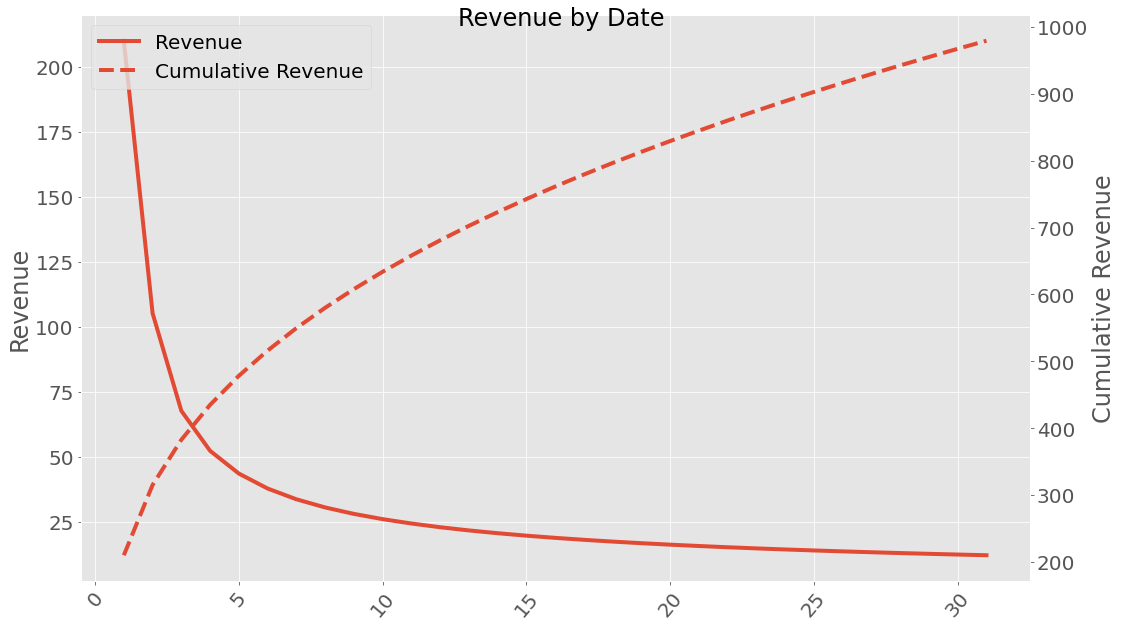

In [4]:
facebook.plot_revenue();

If we are interested in uncertainties the [Uncertainties](https://pypi.org/project/uncertainties/) package have been implemented. This can be used the following way:

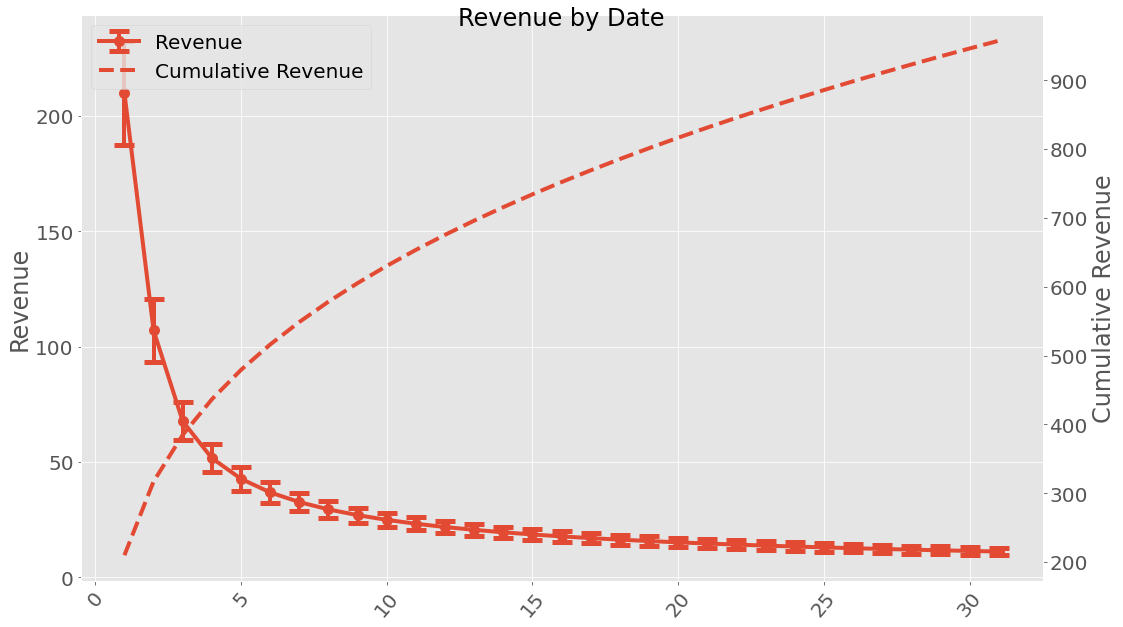

In [5]:
from pyfreya import ufloat

retention_values= [ufloat(50, 3), ufloat(15, 1), ufloat(5, 0.5)]
days_since_install = [1, 7, 30] # no uncertainties here.
new_users = ufloat(100, 5)
facebook = Cohort(new_users, days_since_install, retention_values)
facebook.revenue_profile = ARPDAU(ufloat(2.1, 0.2))
facebook.apply_revenue()
facebook.plot_revenue()

When working with uncertainties, the nominal values and the uncertainty values can be obtained with functions `nominal_values` and `std_devs`, respectively:

In [6]:
from pyfreya import nominal_values, std_devs

facebook.df_dau['revenue']

Date
1       210+/-23
2       107+/-14
3         68+/-8
4         52+/-6
5         43+/-5
6         37+/-4
7         33+/-4
8         30+/-4
9     27.0+/-3.3
10    25.0+/-3.1
11    23.3+/-2.9
12    21.9+/-2.8
13    20.6+/-2.6
14    19.6+/-2.5
15    18.6+/-2.4
16    17.8+/-2.3
17    17.1+/-2.2
18    16.4+/-2.2
19    15.8+/-2.1
20    15.2+/-2.0
21    14.7+/-2.0
22    14.2+/-1.9
23    13.8+/-1.9
24    13.4+/-1.8
25    13.0+/-1.8
26    12.7+/-1.8
27    12.4+/-1.7
28    12.1+/-1.7
29    11.8+/-1.7
30    11.5+/-1.6
31    11.2+/-1.6
Name: revenue, dtype: object

In [7]:
nominal_values(facebook.df_dau['revenue'])

array([210.        , 107.11673044,  67.66930193,  51.72634515,
        42.74901227,  36.8733419 ,  32.67730124,  29.50438329,
        27.00601304,  24.97849563,  23.29415112,  21.86853369,
        20.64336873,  19.57703135,  18.63892795,  17.80602528,
        17.06062202,  16.38887082,  15.77976993,  15.22445827,
        14.71571191,  14.24757745,  13.81510062,  13.41412211,
        13.04112202,  12.69309974,  12.36748022,  12.06203999,
        11.77484823,  11.50421944,  11.24867512])

In [8]:
std_devs(facebook.df_dau['revenue'])

array([22.588714  , 13.73966474,  8.17827559,  6.15442801,  5.07962406,
        4.40195366,  3.9300445 ,  3.57937697,  3.3066122 ,  3.08712987,
        2.90585349,  2.75300466,  2.62194609,  2.5080031 ,  2.40778109,
        2.31875073,  2.23898552,  2.16699004,  2.1015841 ,  2.04182268,
        1.9869392 ,  1.93630468,  1.88939763,  1.84578168,  1.80508855,
        1.76700502,  1.73126286,  1.69763082,  1.66590837,  1.63592067,
        1.60751445])

It is possible to save a revenue class instance (using *pickle*) and loading it.

```python
facebook.save('facebook_revenue.pkl')
facebook_loaded = pyfreya.load('facebook_revenue.pkl')
```